# Import Library 


In [629]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 
sns.set()

# Data set analysis

## Customer_Churn

In [630]:
Data_Main  = pd.read_csv('/content/Telco_customer_churn.csv')
Data_Main.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [631]:
Data_Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Operation : 
- i will drop all featue that has one value 

In [632]:
for Feature in Data_Main.columns : 
  if Data_Main[Feature].nunique() == 1 : 
      Data_Main.drop([Feature],axis=1,inplace=True)

In [633]:
Data_Main.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Comment :     
- i can drop Lat Long because meaning data , the chrun accutr from the customer then the location of customer did not effect on the customer churn 

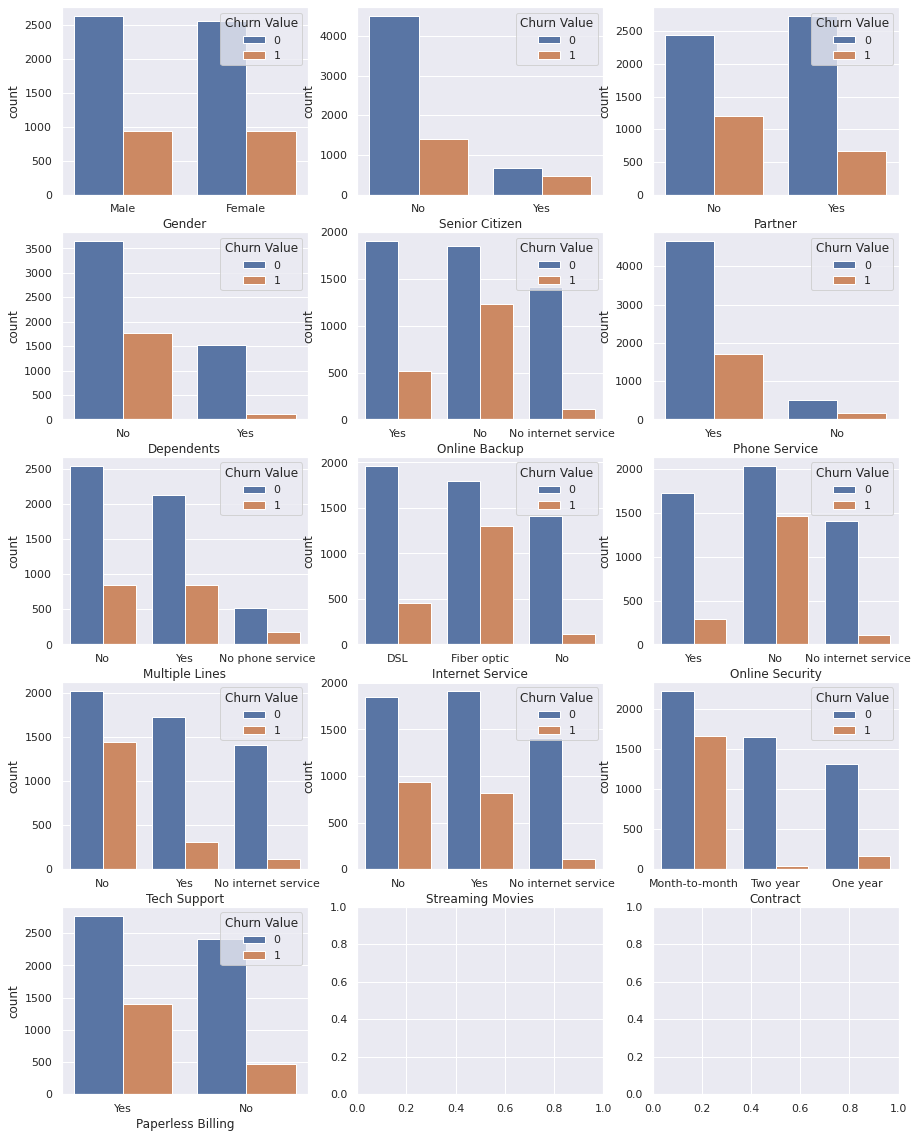

In [634]:

fig , axes =  plt.subplots(5,3,figsize=(15,20))
sns.countplot(data= Data_Main ,x = 'Gender', hue= 'Churn Value',ax = axes[0][0])
sns.countplot(data= Data_Main ,x = 'Senior Citizen', hue= 'Churn Value',ax = axes[0][1])
sns.countplot(data= Data_Main ,x = 'Partner', hue= 'Churn Value',ax = axes[0][2])
sns.countplot(data= Data_Main ,x = 'Dependents', hue= 'Churn Value',ax = axes[1][0])
sns.countplot(data= Data_Main ,x = 'Online Backup', hue= 'Churn Value',ax = axes[1][1])
sns.countplot(data= Data_Main ,x = 'Phone Service', hue= 'Churn Value',ax = axes[1][2])
sns.countplot(data= Data_Main ,x = 'Multiple Lines', hue= 'Churn Value',ax = axes[2][0])
sns.countplot(data= Data_Main ,x = 'Internet Service', hue= 'Churn Value',ax = axes[2][1])
sns.countplot(data= Data_Main ,x = 'Online Security', hue= 'Churn Value',ax = axes[2][2])
sns.countplot(data= Data_Main ,x = 'Tech Support', hue= 'Churn Value',ax = axes[3][0])
sns.countplot(data= Data_Main ,x = 'Streaming Movies', hue= 'Churn Value',ax = axes[3][1])
sns.countplot(data= Data_Main ,x = 'Contract', hue= 'Churn Value',ax = axes[3][2])
sns.countplot(data= Data_Main ,x = 'Paperless Billing', hue= 'Churn Value',ax = axes[4][0])





### Comment  :    
- Gender :     
                         -> number of male and female in churn and not churn is same value  , then i can drop the gender feature
- Senior_Citizen:
                         -> the percentage (churn |Senior_Citizen = NO ) = 21 % and the percentage (churn |Senior_Citizen = YES ) = 42 
i think perfer that the senior citizin is not exist  
- partner :     
                         -> perfer partner is exist because when the partner exist , the customer chruns decrease
- online security : 
                         -> No exist the chrun become highly 
                         -> NO internet service , the chrun become low
- internet service  : 
                         -> DSL : is normal in internet service , the churn IS accepted 
                         -> Fiber Service : is the worst internet service , the churn is highely 
                         -> No internet service  :  the churn become low 

- Multiple Lines :    
                        -> No or yes , the churn is not change 
                        -> no phone service  : churn become not accepted because some customers not use phone service , but the churn is hign relative to  the number of people do no use the phone services 

- Phone Service  : 
                        -> when using the phone service  ,the churn is acceptable  

- Online Backup : 
                        -> when using the backup , the churn is decrease 

- Dependent : 
                        -> when there are dependents , the churn become low  

- Tech Support : 
                        -> when the tech support is exist , the churn become low 

- streaming movies:
                        -> when using the streaming movies  , the churn is not change  

- Contact :    
                        -> when the interval of contact increase , the churn is low 

-  paperless billing :     
                        -> when using paperless billing , the churn is low 

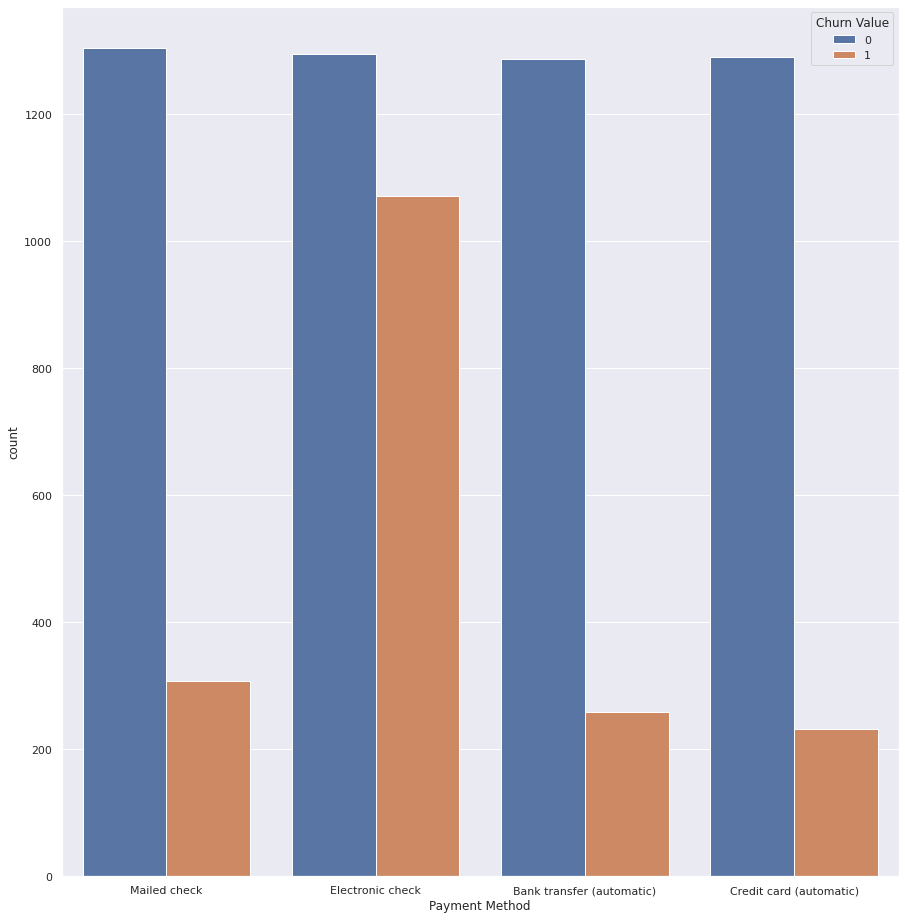

In [635]:
plt.figure (figsize = (15,16))
sns.countplot(data= Data_Main ,x = 'Payment Method', hue= 'Churn Value')

### Comment 
- Eletronic check is worst payment method 

### Label Encoding  

In [636]:
#transform the string data to the numerical data 
from sklearn.preprocessing import LabelEncoder
#ENVIROMENT : 
Label_root = LabelEncoder()

Label_Gender = Label_root.fit_transform(Data_Main['Gender'])
Label_Senior =Label_root.fit_transform (Data_Main['Senior Citizen'])
Label_Dependents = Label_root.fit_transform(Data_Main['Dependents'])
Label_Backup = Label_root.fit_transform(Data_Main['Online Backup'])
Label_Security = Label_root.fit_transform(Data_Main['Online Security'])
Label_Internet = Label_root.fit_transform(Data_Main['Internet Service'])
Label_Phone = Label_root.fit_transform(Data_Main['Phone Service'])
Label_Tech = Label_root.fit_transform(Data_Main['Tech Support'])
Label_Streaming = Label_root.fit_transform(Data_Main['Streaming Movies'])
Label_Contract = Label_root.fit_transform(Data_Main['Contract'])
Label_Paperless = Label_root.fit_transform(Data_Main['Paperless Billing'])
Label_Payment = Label_root.fit_transform(Data_Main['Payment Method'])
Label_churn = Label_root.fit_transform(Data_Main['Churn Label'])
Label_churn_Res = Label_root.fit_transform(Data_Main['Churn Reason'])
Label_churn_Par = Label_root.fit_transform(Data_Main['Partner'])
Label_churn_Mul = Label_root.fit_transform(Data_Main['Multiple Lines'])
Label_churn_Dev = Label_root.fit_transform(Data_Main['Device Protection'])
Label_TV = Label_root.fit_transform(Data_Main['Streaming TV'])


Data_Main['Streaming TV'] =Label_TV 
Data_Main['Device Protection'] = Label_churn_Dev
Data_Main['Multiple Lines'] = Label_churn_Mul
Data_Main['Partner'] = Label_churn_Par
Data_Main['Churn Reason']=Label_churn_Res
Data_Main['Gender']=Label_Gender     
Data_Main['Senior Citizen']=Label_Senior     
Data_Main['Dependents']=Label_Dependents 
Data_Main['Online Backup']=Label_Backup     
Data_Main['Online Security']=Label_Security   
Data_Main['Internet Service']=Label_Internet   
Data_Main['Phone Service']=Label_Phone      
Data_Main['Tech Support']=Label_Tech       
Data_Main['Streaming Movies']=Label_Streaming  
Data_Main['Contract']=Label_Contract   
Data_Main['Paperless Billing']=Label_Paperless  
Data_Main['Payment Method']=Label_Payment     
Data_Main['Churn Label'] = Label_churn

In [637]:
Data_Main.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,0,0,0,...,0,1,3,53.85,108.15,1,1,86,3239,3
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,0,0,1,...,0,1,2,70.70,151.65,1,1,67,2701,13
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,0,0,1,...,0,1,2,99.65,820.5,1,1,86,5372,13
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,0,1,1,...,0,1,2,104.80,3046.05,1,1,84,5003,13
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,0,0,1,...,0,1,0,103.70,5036.3,1,1,89,5340,2


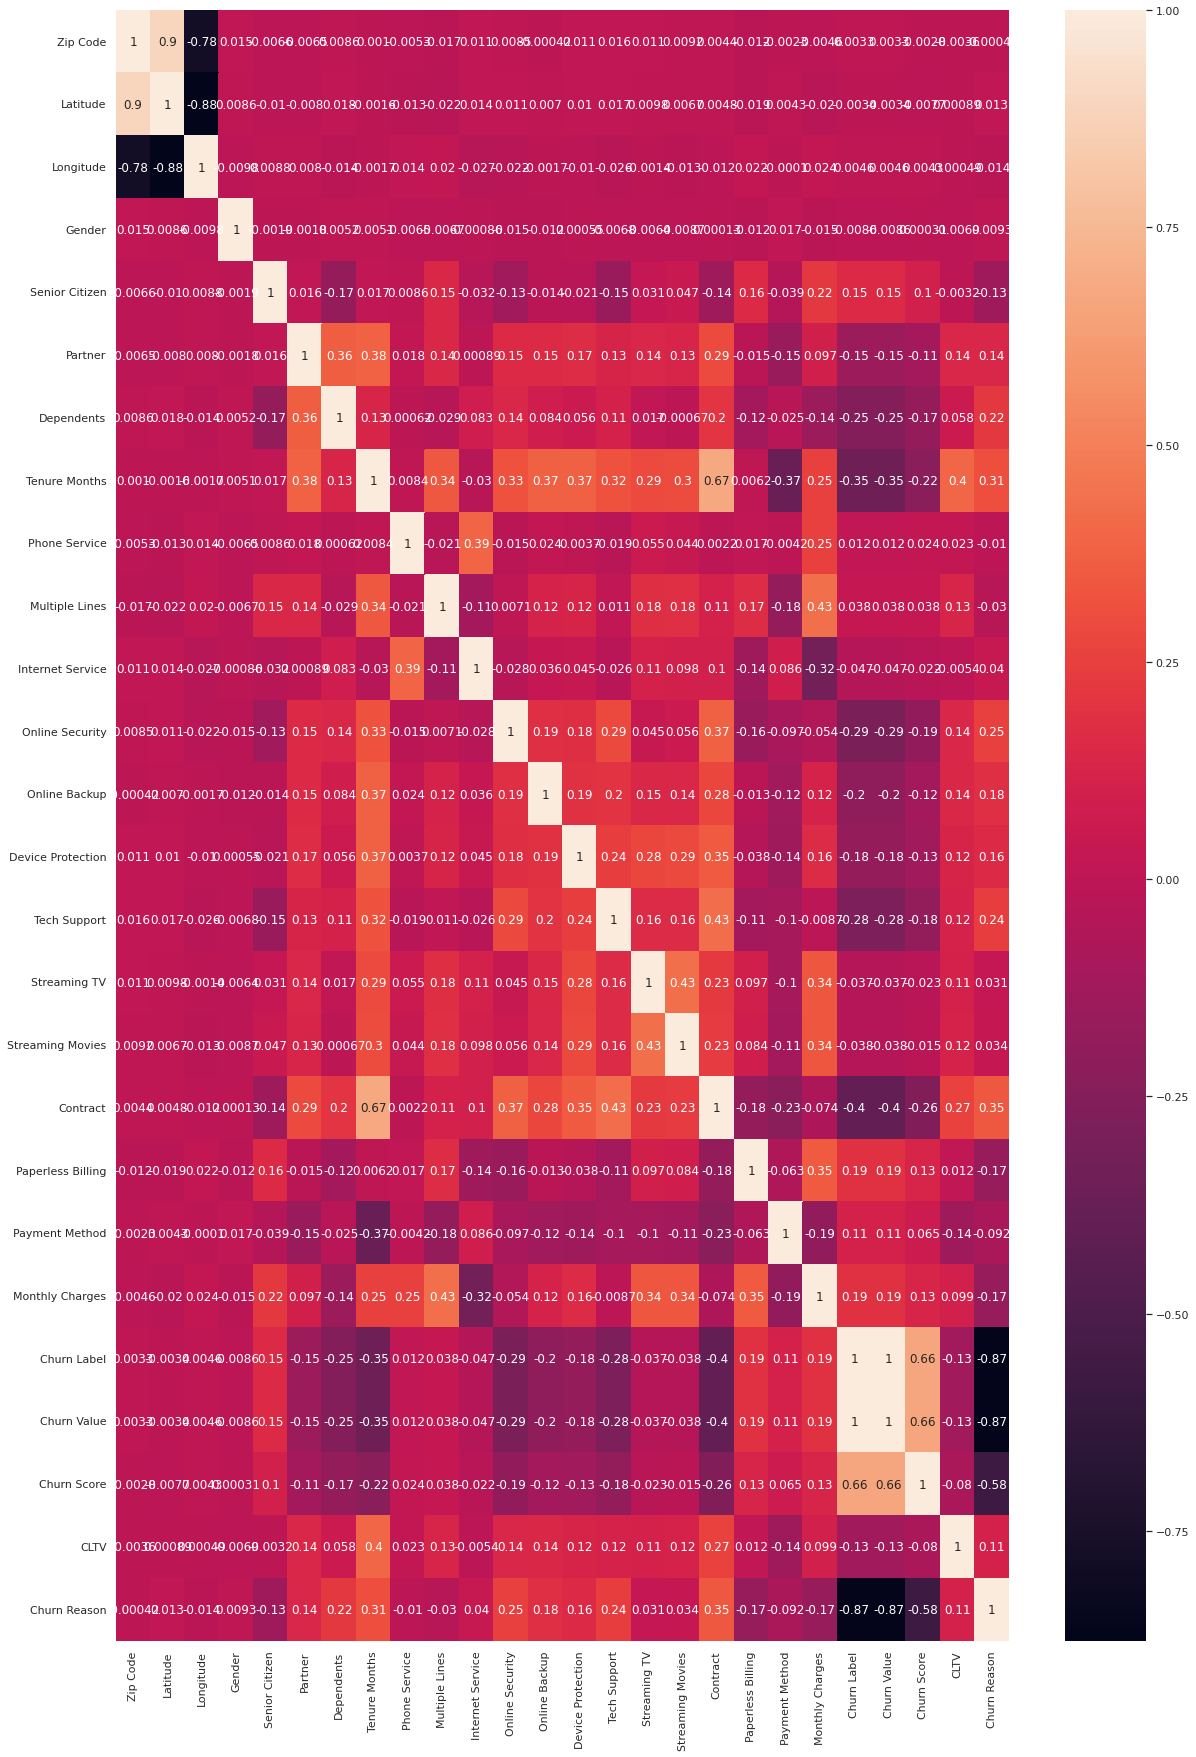

In [638]:
plt.figure(figsize =(20,30))
sns.heatmap(Data_Main.corr(),annot=True)

# Conclusion [Customer_Churn]
- The locations feature that not effect the churn , then : 
> I will drop all feature related to location except the zip code because it common between other dataset , iwill use it to concatenate between the dataset and then drop it finially 
- The Gender is not effect : the male and female is same number in churn and not churn , then 🇰
> I will drop the gender feature 
- Multi lines include the phone service , then :    
> I will drop the phone services feature 
- Churn label , Churn value , Churn score ,then :    
> I will drop  Churn label and Churn score

In [639]:
# Conclusion 1 
Data_Main.drop(['City','Lat Long'],axis=1,inplace=True) 

In [640]:
# Conclusion 2 
Data_Main.drop(['Gender'],axis=1,inplace=True)

In [641]:
# Conclusion 3 
Data_Main.drop(['Phone Service'],axis=1,inplace=True)

In [642]:
# Conclusion 4 
Data_Main.drop(['Churn Label','Churn Score'],axis=1,inplace=True)

In [643]:
Data_Main.head()

,CustomerID,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason
0,3668-QPYBK,90003,33.964131,-118.272783,0,0,0,2,0,0,...,0,0,0,1,3,53.85,108.15,1,3239,3
1,9237-HQITU,90005,34.059281,-118.307420,0,0,1,2,0,1,...,0,0,0,1,2,70.70,151.65,1,2701,13
2,9305-CDSKC,90006,34.048013,-118.293953,0,0,1,8,2,1,...,2,2,0,1,2,99.65,820.5,1,5372,13
3,7892-POOKP,90010,34.062125,-118.315709,0,1,1,28,2,1,...,2,2,0,1,2,104.80,3046.05,1,5003,13
4,0280-XJGEX,90015,34.039224,-118.266293,0,0,1,49,2,1,...,2,2,0,1,0,103.70,5036.3,1,5340,2


# Data_Set_churn_Demograph 

In [644]:
Data_Dem = pd.read_csv('/content/Telco_customer_churn_demographics.csv')
Data_Dem.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


### Comment :     
- I will Drop 
> 1- Dependents 2- Senior Citizen 3- Gender	4- Count
- I can drop the dependents from all data set because number of Dependents has more details of dependency
- I can drop under 30 feature because age has more details about age 


In [645]:
from sklearn.preprocessing import LabelEncoder
#ENVIROMENT : 
Label_root = LabelEncoder()
Label_Married = Label_root.fit_transform(Data_Dem['Married'])
Data_Dem['Married'] = Label_Married

In [646]:
Data_Dem.drop(['Count','Gender','Under 30','Senior Citizen','Dependents'],axis =1 , inplace = True)

In [647]:
Data_Dem.head()


,Customer ID,Age,Married,Number of Dependents
0,8779-QRDMV,78,0,0
1,7495-OOKFY,74,1,1
2,1658-BYGOY,71,0,3
3,4598-XLKNJ,78,1,1
4,4846-WHAFZ,80,1,1


In [648]:
Data_Dem.sort_values(by='Customer ID',inplace=True)

In [649]:
Data_Dem.head()

,Customer ID,Age,Married,Number of Dependents
4006,0002-ORFBO,37,1,0
4788,0003-MKNFE,46,0,0
1901,0004-TLHLJ,50,0,0
395,0011-IGKFF,78,1,0
368,0013-EXCHZ,75,1,0


In [650]:
Data_Dem.set_index('Customer ID',inplace =True)

In [651]:
Data_Main.head()

,CustomerID,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason
0,3668-QPYBK,90003,33.964131,-118.272783,0,0,0,2,0,0,...,0,0,0,1,3,53.85,108.15,1,3239,3
1,9237-HQITU,90005,34.059281,-118.307420,0,0,1,2,0,1,...,0,0,0,1,2,70.70,151.65,1,2701,13
2,9305-CDSKC,90006,34.048013,-118.293953,0,0,1,8,2,1,...,2,2,0,1,2,99.65,820.5,1,5372,13
3,7892-POOKP,90010,34.062125,-118.315709,0,1,1,28,2,1,...,2,2,0,1,2,104.80,3046.05,1,5003,13
4,0280-XJGEX,90015,34.039224,-118.266293,0,0,1,49,2,1,...,2,2,0,1,0,103.70,5036.3,1,5340,2


In [652]:
Data_Main.sort_values(by='CustomerID',inplace=True)
Data_Main.head()

,CustomerID,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason
3564,0002-ORFBO,93225,34.827662,-118.999073,0,1,0,9,0,0,...,2,0,1,1,3,65.6,593.3,0,2205,20
4447,0003-MKNFE,91206,34.162515,-118.203869,0,0,0,9,2,0,...,0,2,0,0,3,59.9,542.4,0,5414,20
1016,0004-TLHLJ,92627,33.645672,-117.922613,0,0,0,4,0,1,...,0,0,0,1,2,73.9,280.85,1,4479,17
1564,0011-IGKFF,94553,38.014457,-122.115432,1,1,0,13,0,1,...,2,2,0,1,2,98.0,1237.85,1,3714,18
1464,0013-EXCHZ,93010,34.227846,-119.079903,1,1,0,3,0,1,...,2,0,0,1,3,83.9,267.4,1,3464,14


In [653]:
Data_Main.set_index('CustomerID',inplace =True)

In [654]:
Data_Merge = pd.concat([Data_Main,Data_Dem] ,axis= 1 )

In [655]:
Data_Merge.head()


,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason,Age,Married,Number of Dependents
0002-ORFBO,93225,34.827662,-118.999073,0,1,0,9,0,0,0,...,1,3,65.6,593.3,0,2205,20,37,1,0
0003-MKNFE,91206,34.162515,-118.203869,0,0,0,9,2,0,0,...,0,3,59.9,542.4,0,5414,20,46,0,0
0004-TLHLJ,92627,33.645672,-117.922613,0,0,0,4,0,1,0,...,1,2,73.9,280.85,1,4479,17,50,0,0
0011-IGKFF,94553,38.014457,-122.115432,1,1,0,13,0,1,0,...,1,2,98.0,1237.85,1,3714,18,78,1,0
0013-EXCHZ,93010,34.227846,-119.079903,1,1,0,3,0,1,0,...,1,3,83.9,267.4,1,3464,14,75,1,0


In [656]:
Data_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              7043 non-null   int64  
 1   Latitude              7043 non-null   float64
 2   Longitude             7043 non-null   float64
 3   Senior Citizen        7043 non-null   int64  
 4   Partner               7043 non-null   int64  
 5   Dependents            7043 non-null   int64  
 6   Tenure Months         7043 non-null   int64  
 7   Multiple Lines        7043 non-null   int64  
 8   Internet Service      7043 non-null   int64  
 9   Online Security       7043 non-null   int64  
 10  Online Backup         7043 non-null   int64  
 11  Device Protection     7043 non-null   int64  
 12  Tech Support          7043 non-null   int64  
 13  Streaming TV          7043 non-null   int64  
 14  Streaming Movies      7043 non-null   int64  
 15  Contract   

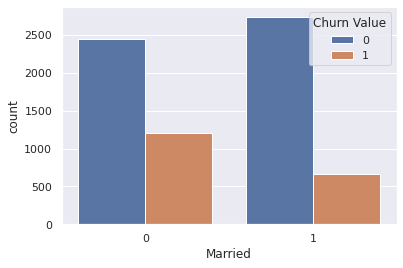

In [657]:
sns.countplot(x='Married',data=Data_Merge,hue='Churn Value')

### Comment  :    
- when customer married , the churn become low 

In [658]:
#  drop the dependents feature 
Data_Merge.drop(['Dependents'],axis =1 , inplace =True)

# Customer_Churn_Status

In [659]:
Data_Churn_State = pd.read_csv('/content/Telco_customer_churn_status.csv')
Data_Churn_State.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [660]:
for Feature in Data_Churn_State.columns : 
  if Data_Churn_State[Feature].nunique() == 1 : 
      Data_Churn_State.drop([Feature],axis=1,inplace=True)

In [661]:
Data_Churn_State.head()

,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [662]:
Label_root = LabelEncoder()

Label_Customer=Label_root.fit_transform (Data_Churn_State['Customer Status'])
Label_Label = Label_root.fit_transform(Data_Churn_State['Churn Label'])
Label_Category = Label_root.fit_transform(Data_Churn_State['Churn Category'])
Label_Reason = Label_root.fit_transform(Data_Churn_State['Churn Reason'])

Data_Churn_State['Customer Status']= Label_Customer
Data_Churn_State['Churn Label'] = Label_Label
Data_Churn_State['Churn Category']=Label_Category 
Data_Churn_State['Churn Reason']=Label_Reason     

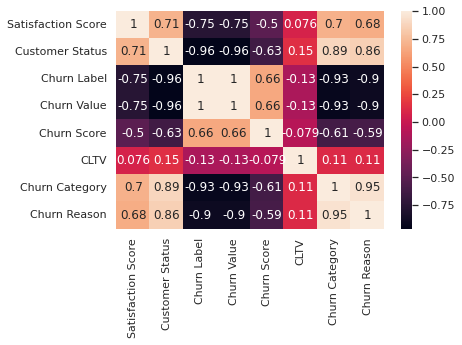

In [663]:
sns.heatmap(Data_Churn_State.corr(),annot=True)

### Comment :    
- i will extract the statisfication score only in data set 
-  replace the Churn Reason with	Churn Category

In [664]:
Data_Churn_State.drop(['Customer Status',	'Churn Label',	'Churn Value',	'Churn Score'	,'CLTV' ,	'Churn Reason'],axis =1 , inplace =True) 

In [665]:
Data_Churn_State.head()

,Customer ID,Satisfaction Score,Churn Category
0,8779-QRDMV,3,1
1,7495-OOKFY,3,1
2,1658-BYGOY,2,1
3,4598-XLKNJ,2,2
4,4846-WHAFZ,2,4


In [666]:
Data_Churn_State.sort_values(by='Customer ID',inplace=True)
Data_Churn_State.head()
Data_Churn_State.set_index('Customer ID',inplace=True)

In [667]:
Data_Churn_State.head()

,Satisfaction Score,Churn Category
Customer ID,,
0002-ORFBO,3,5
0003-MKNFE,5,5
0004-TLHLJ,1,1
0011-IGKFF,1,2
0013-EXCHZ,1,2


In [668]:
Data_Merge1 = pd.concat([Data_Merge,Data_Churn_State] ,axis= 1 )

In [669]:
Data_Merge1.head()

,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,...,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason,Age,Married,Number of Dependents,Satisfaction Score,Churn Category
0002-ORFBO,93225,34.827662,-118.999073,0,1,9,0,0,0,2,...,65.6,593.3,0,2205,20,37,1,0,3,5
0003-MKNFE,91206,34.162515,-118.203869,0,0,9,2,0,0,0,...,59.9,542.4,0,5414,20,46,0,0,5,5
0004-TLHLJ,92627,33.645672,-117.922613,0,0,4,0,1,0,0,...,73.9,280.85,1,4479,17,50,0,0,1,1
0011-IGKFF,94553,38.014457,-122.115432,1,1,13,0,1,0,2,...,98.0,1237.85,1,3714,18,78,1,0,1,2
0013-EXCHZ,93010,34.227846,-119.079903,1,1,3,0,1,0,0,...,83.9,267.4,1,3464,14,75,1,0,1,2


In [670]:
Data_Merge1.drop(['Churn Reason'],axis =1 ,inplace = True)
Data_Merge1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              7043 non-null   int64  
 1   Latitude              7043 non-null   float64
 2   Longitude             7043 non-null   float64
 3   Senior Citizen        7043 non-null   int64  
 4   Partner               7043 non-null   int64  
 5   Tenure Months         7043 non-null   int64  
 6   Multiple Lines        7043 non-null   int64  
 7   Internet Service      7043 non-null   int64  
 8   Online Security       7043 non-null   int64  
 9   Online Backup         7043 non-null   int64  
 10  Device Protection     7043 non-null   int64  
 11  Tech Support          7043 non-null   int64  
 12  Streaming TV          7043 non-null   int64  
 13  Streaming Movies      7043 non-null   int64  
 14  Contract              7043 non-null   int64  
 15  Paperless B

# Churn_Services

In [671]:
Data_Serv = pd.read_csv('/content/Telco_customer_churn_services.csv')
Data_Serv.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [672]:
for Feature in Data_Serv.columns : 
  if Data_Serv[Feature].nunique() == 1 : 
      Data_Serv.drop([Feature],axis=1,inplace=True)

In [673]:
Data_Serv.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,DSL,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [674]:
Data_Serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Comment : 
i will drop 'Tenure in Months',' Phone Service ','Multiple Lines ','Internet Service' ,'Internet Type' ,'Online Security' ,'Online Backup','Contract' ,'Paperless Billing',  'Payment Method'   

In [675]:
Data_Serv.drop(['Streaming Movies','Streaming TV','Tenure in Months','Phone Service','Multiple Lines','Internet Service' ,'Internet Type' ,'Online Security' ,'Online Backup','Contract' ,'Paperless Billing',  'Payment Method' ],axis =1  , inplace =True)


In [676]:
Data_Serv.head()

,Customer ID,Referred a Friend,Number of Referrals,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,No,0,None,0.00,8,Yes,No,No,No,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,Offer E,48.85,17,No,No,No,Yes,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,Offer D,11.33,52,No,No,Yes,Yes,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,Offer C,19.76,12,Yes,No,No,Yes,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,Offer C,6.33,14,No,No,No,Yes,76.50,2868.15,0.00,0,234.21,3102.36


In [677]:
from sklearn.preprocessing import LabelEncoder
#ENVIROMENT : 
Label_root = LabelEncoder()

 
Label_Unlimited  =Label_root.fit_transform(Data_Serv['Unlimited Data'])
Label_Music	     =Label_root.fit_transform(Data_Serv['Streaming Music'])
Label_Premium    =Label_root.fit_transform(Data_Serv['Premium Tech Support'])
Label_Device     =Label_root.fit_transform(Data_Serv['Device Protection Plan'])
Label_Offer      =Label_root.fit_transform(Data_Serv['Offer'])
Label_Referred   =Label_root.fit_transform(Data_Serv['Referred a Friend'])


Data_Serv['Unlimited Data']             =Label_Unlimited 
Data_Serv['Streaming Music']            =Label_Music	    
Data_Serv['Premium Tech Support']       =Label_Premium   
Data_Serv['Device Protection Plan']     =Label_Device    
Data_Serv['Offer']                      =Label_Offer     
Data_Serv['Referred a Friend']          =Label_Referred  



In [678]:
Data_Serv.head()

,Customer ID,Referred a Friend,Number of Referrals,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,0,0,0,0.00,8,1,0,0,0,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,1,5,48.85,17,0,0,0,1,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,0,0,4,11.33,52,0,0,1,1,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,1,3,19.76,12,1,0,0,1,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,1,3,6.33,14,0,0,0,1,76.50,2868.15,0.00,0,234.21,3102.36


### Comment :     
i can drop the Total Long Distance Charges

In [679]:
Data_Serv.drop(['Total Extra Data Charges'],axis = 1 , inplace = True)

In [680]:
Data_Serv.sort_values(by='Customer ID',inplace=True)
Data_Serv.set_index('Customer ID',inplace=True)
Data_Serv.head()

,Referred a Friend,Number of Referrals,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue
Customer ID,,,,,,,,,,,,,,
0002-ORFBO,1,2,0,42.39,16,0,1,0,1,65.6,593.30,0.00,381.51,974.81
0003-MKNFE,0,0,0,10.69,10,0,0,1,0,59.9,542.40,38.33,96.21,610.28
0004-TLHLJ,0,0,5,33.65,30,1,0,0,1,73.9,280.85,0.00,134.60,415.45
0011-IGKFF,1,1,4,27.82,4,1,0,0,1,98.0,1237.85,0.00,361.66,1599.51
0013-EXCHZ,1,3,0,7.38,11,0,1,0,1,83.9,267.40,0.00,22.14,289.54


In [681]:
Data_Merge2 = pd.concat([Data_Merge1,Data_Serv] ,axis= 1 )

In [682]:
Data_Merge2.head()

,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,...,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue
0002-ORFBO,93225,34.827662,-118.999073,0,1,9,0,0,0,2,...,16,0,1,0,1,65.6,593.30,0.00,381.51,974.81
0003-MKNFE,91206,34.162515,-118.203869,0,0,9,2,0,0,0,...,10,0,0,1,0,59.9,542.40,38.33,96.21,610.28
0004-TLHLJ,92627,33.645672,-117.922613,0,0,4,0,1,0,0,...,30,1,0,0,1,73.9,280.85,0.00,134.60,415.45
0011-IGKFF,94553,38.014457,-122.115432,1,1,13,0,1,0,2,...,4,1,0,0,1,98.0,1237.85,0.00,361.66,1599.51
0013-EXCHZ,93010,34.227846,-119.079903,1,1,3,0,1,0,0,...,11,0,1,0,1,83.9,267.40,0.00,22.14,289.54


In [683]:
Data_Merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zip Code                           7043 non-null   int64  
 1   Latitude                           7043 non-null   float64
 2   Longitude                          7043 non-null   float64
 3   Senior Citizen                     7043 non-null   int64  
 4   Partner                            7043 non-null   int64  
 5   Tenure Months                      7043 non-null   int64  
 6   Multiple Lines                     7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection                  7043 non-null   int64  
 11  Tech Support                       7043 non-nu

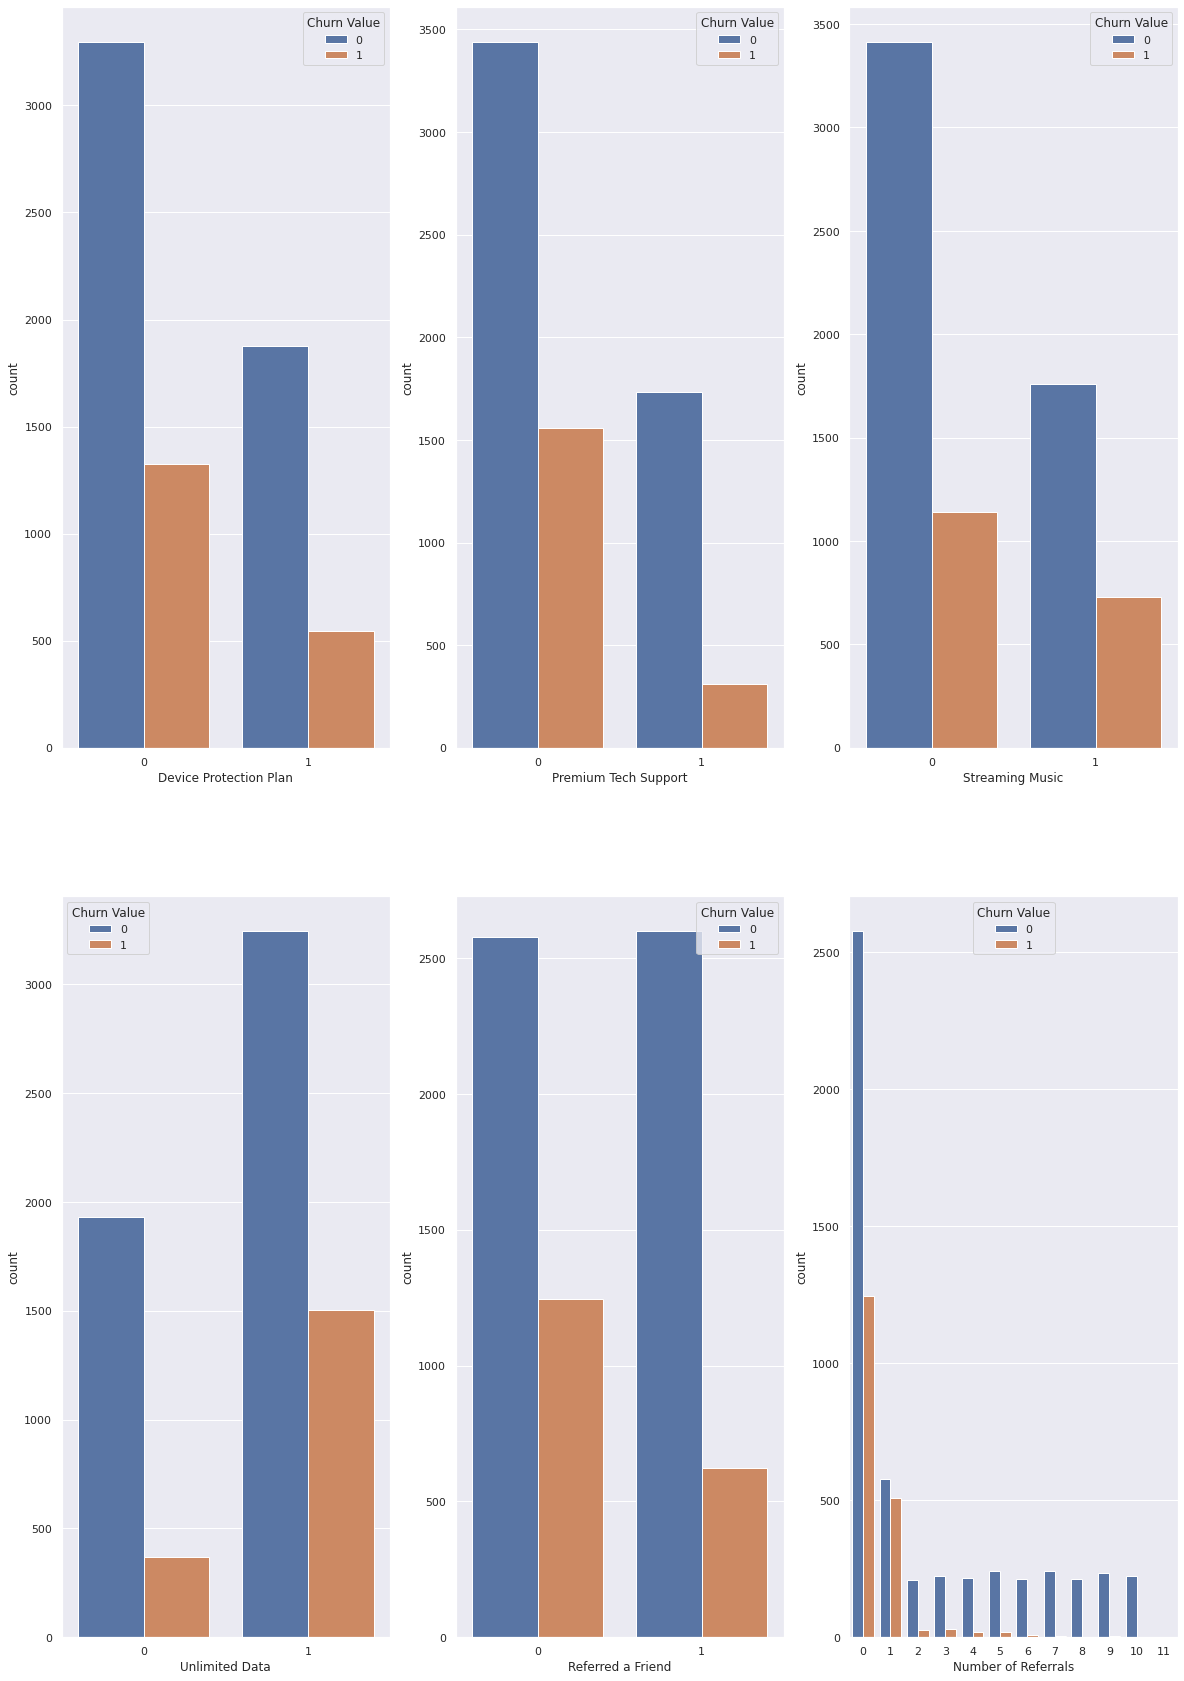

In [684]:


fig ,axes = plt.subplots(2,3,figsize= (20,30))
sns.countplot(data=Data_Merge2 , x= 'Device Protection Plan' ,hue='Churn Value',ax= axes[0][0])
sns.countplot(data=Data_Merge2 , x= 'Premium Tech Support'   ,hue='Churn Value',ax= axes[0][1])
sns.countplot(data=Data_Merge2 , x= 'Streaming Music'        ,hue='Churn Value',ax= axes[0][2])
sns.countplot(data=Data_Merge2 , x= 'Unlimited Data'         ,hue='Churn Value',ax= axes[1][0])
sns.countplot(data=Data_Merge2 , x= 'Referred a Friend'      ,hue='Churn Value',ax= axes[1][1])
sns.countplot(data=Data_Merge2 , x= 'Number of Referrals'    ,hue='Churn Value',ax= axes[1][2])


			
	
# Conclusion :     
- Device Protection Plan : 
> when there is device protection plan , the churn become low 
- Premium Tech Support   :     
> when there is Premium Tech Support  , the churn become low 
- Streaming Music        :     
> Streaming Music is effect on the churn , because the churnremain highly relative to churn 
- Unlimited Data         :     
> when there is unlimited data , the churn become high
- Referred a Friend      :
> Referred a Friend effect on churn ,the churn become low
- Number of Referrals    :     
> whenever the number of referrals , the churn decrease 


In [685]:
Data_Merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zip Code                           7043 non-null   int64  
 1   Latitude                           7043 non-null   float64
 2   Longitude                          7043 non-null   float64
 3   Senior Citizen                     7043 non-null   int64  
 4   Partner                            7043 non-null   int64  
 5   Tenure Months                      7043 non-null   int64  
 6   Multiple Lines                     7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection                  7043 non-null   int64  
 11  Tech Support                       7043 non-nu

In [686]:
Data_Merge2.drop(['Churn Category','Zip Code','Total Charges'],axis=1,inplace=True)

In [687]:
Data_Merge2[20:].head()

,Latitude,Longitude,Senior Citizen,Partner,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Long Distance Charges,Total Revenue
0023-UYUPN,37.375816,-119.739935,1,1,50,2,2,1,1,1,...,31.43,0,0,0,0,0,25.20,0.0,1571.50,2877.80
0023-XUOPT,39.227434,-120.091806,0,1,13,2,1,0,2,2,...,43.56,52,1,0,0,1,94.10,0.0,566.28,1781.88
0027-KWYKW,35.869626,-119.498771,0,1,23,2,1,0,0,0,...,34.91,30,0,0,0,1,83.75,0.0,802.93,2652.88
0030-FNXPP,36.560498,-117.962461,0,0,3,0,2,1,1,1,...,3.12,0,0,0,0,0,19.85,0.0,9.36,66.56
0031-PVLZI,40.766600,-123.804580,0,1,4,0,2,1,1,1,...,12.43,0,0,0,0,0,20.35,0.0,49.72,126.07


# Machine Learning

In [688]:
y= Data_Merge2['Churn Value']
x= Data_Merge2.drop(['Churn Value'] ,axis =1)

In [689]:
# library of split to train and the test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=0)

In [690]:
'''
Implement one Funcion : 
                        1- Confusion_Matrix

'''

from sklearn.metrics import confusion_matrix 


'''
Argument of Confusion_Matrix : 
                              1-y_test : is the test of dataset
                              2-y_pred L is the predicted output from model 
                              3-title : the title of heatmap
                              4-Positive_term : term (1)
                              5-Negative_term : term (0)
'''
def Confusion_Matrix (y_test , y_Pred ,title,Positive_term, Negative_term): 
  # confusion matrix 
  Conf_Mat  = confusion_matrix(y_test , y_Pred)

  Con_Plot = sns.heatmap(Conf_Mat , annot =True , cmap='Blues')

  Con_Plot.set_title(title)
  Con_Plot.set_xlabel('\nPredicted Values')
  Con_Plot.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  Con_Plot.xaxis.set_ticklabels([Positive_term,Negative_term])
  Con_Plot.yaxis.set_ticklabels([Positive_term,Negative_term])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [691]:
from sklearn import metrics 
def Get_metrics (y_test , y_pred):
  accuracy = metrics.accuracy_score (y_test , y_pred)

  recall = metrics.recall_score(y_test , y_pred)

  prescision = metrics.precision_score(y_test , y_pred)

  f1_score = metrics.f1_score(y_test , y_pred)

  return accuracy , recall , prescision ,f1_score

In [692]:
from sklearn.model_selection  import KFold 
kFlod = KFold(n_splits=5,random_state=0,shuffle=True)

In [693]:
# define the dataframe  
Data_Result = pd.DataFrame(columns=['Techique1','Techique2','Model','Recall','Precesion','F1_Score'])

## Classification Model 

In [694]:
from sklearn.metrics import roc_curve

def ROC (y_test,y_pred_proba): 
  
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

  plt.figure(figsize=(6,4))

  plt.plot(fpr, tpr, linewidth=2)

  plt.plot([0,1], [0,1], 'k--' )

  plt.rcParams['font.size'] = 12

  plt.title('ROC curve for RainTomorrow classifier')

  plt.xlabel('False Positive Rate (1 - Specificity)')

  plt.ylabel('True Positive Rate (Sensitivity)')

  plt.show()

In [695]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from statistics import mean

'''
Techique1 : Select : 1- Cross_Val
                     2- NoCross_Val

Techique2 : Select : 1- Embalaced
                     2- NoEmbalaced

'''
y_pred =None
def Classifcation_Model (Model , Techique1 , Techique2 , x_train , y_train, x_test, y_test ):
  global Data_Result
  global y_pred

  if Model == "Logistic" : 
    Model_Sel = LogisticRegression(random_state=0)

  elif Model == "SVM" :
    Model_Sel = SVC(probability=True) 
  elif Model == "KNN" :
    Model_Sel = KNeighborsClassifier(n_neighbors = 13)

  elif Model == "XGboost":
    Model_Sel = XGBClassifier ()
  
  elif Model == "Naive Bayes" :
    Model_Sel = GaussianNB()
  
  elif Model == "Decision Tree":
    Model_Sel = DecisionTreeClassifier()
  
  elif Model == "Random forest": 
    Model_Sel = RandomForestClassifier()
  else : 
    print ("Please enter the correct Model ....")
    return 1
  
  
  
  if Techique1 == 'Cross_Val' and  Techique2 == 'Embalaced' :
    x_emb , y_emb = Embalaced_Function(x , y)
    score_LRecall = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='recall')
    score_LPrecsion = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='precision')
    score_Lf1Score = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='f1_micro')
    score_Recall =mean (score_LRecall)
    score_Precsion= mean(score_LPrecsion)
    score_f1Score = mean(score_Lf1Score)


  elif Techique1 == 'Cross_Val': 
    
    score_LRecall = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='recall')
    score_LPrecsion = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='precision')
    score_Lf1Score = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='f1_micro')
    score_Recall =mean (score_LRecall)
    score_Precsion= mean(score_LPrecsion)
    score_f1Score = mean(score_Lf1Score)

  elif Techique2 == 'Embalaced':
    x_train_emb , y_train_emb = Embalaced_Function(x_train , y_train)
    Model_Sel.fit(x_train_emb , y_train_emb)
    y_pred= Model_Sel.predict (x_test)
    _,score_Recall ,score_Precsion, score_f1Score =  Get_metrics (y_test , y_pred)
  
  else : 
    Model_Sel.fit(x_train , y_train)
    y_pred= Model_Sel.predict (x_test)
    _,score_Recall ,score_Precsion, score_f1Score = Get_metrics (y_test , y_pred)
    y_pred_proba = Model_Sel.predict_proba(x_test)[::,1]
    ROC (y_test,y_pred_proba)

  Data_Result = Data_Result.append(pd.DataFrame({'Techique1':Techique1,'Techique2':Techique2,'Model':Model,'Recall':score_Recall,'Precesion':score_Precsion,'F1_Score':score_f1Score},index=[0]))



### Logistic Regression

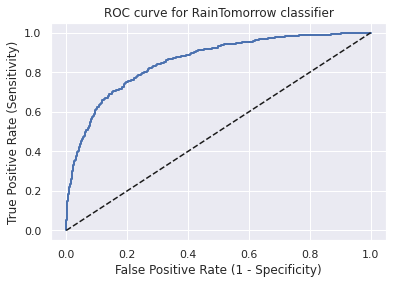

In [696]:
# without cross validation and without Embalaced
Classifcation_Model ("Logistic" , "NoCross_Val","NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Logistic" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )


In [697]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.581056,0.698031,0.634195
0,Cross_Val,NoEmbalaced,Logistic,0.550952,0.701038,0.818255


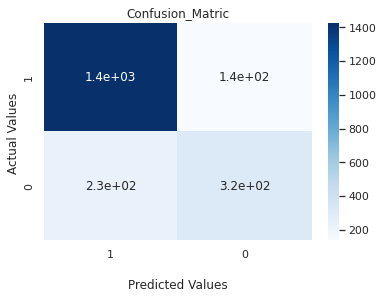

In [698]:
Confusion_Matrix (y_test , y_pred ,'Confusion_Matric','1', '0')


## SVM

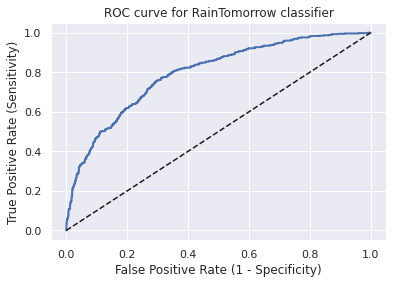

In [699]:
# without cross validation and without Embalaced
Classifcation_Model ("SVM" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("SVM" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

In [700]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.581056,0.698031,0.634195
0,Cross_Val,NoEmbalaced,Logistic,0.550952,0.701038,0.818255
0,NoCross_Val,NoEmbalaced,SVM,0.000000,0.000000,0.000000
0,Cross_Val,NoEmbalaced,SVM,0.000000,0.000000,0.734627


## KNN

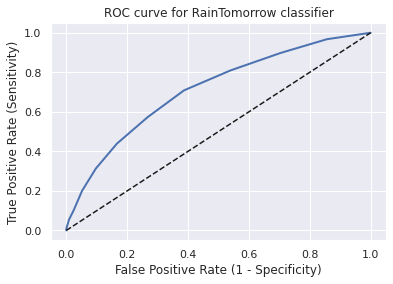

In [701]:
# without cross validation and without Embalaced
Classifcation_Model ("KNN" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("KNN" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

## XGboost

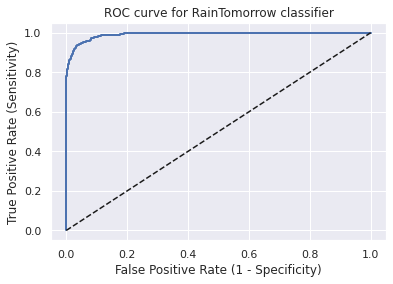

In [702]:
# without cross validation and without Embalaced
Classifcation_Model ("XGboost" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("XGboost" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

## Naive Bayes

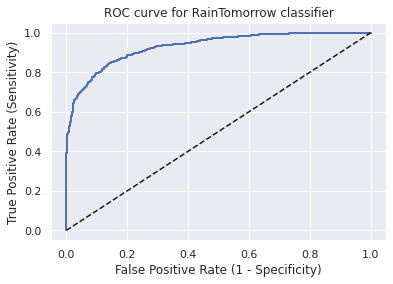

In [703]:
# without cross validation and without Embalaced
Classifcation_Model ("Naive Bayes" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Naive Bayes" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

## Decision Tree



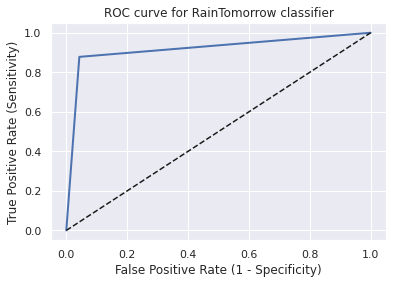

In [704]:
# without cross validation and without Embalaced
Classifcation_Model ("Decision Tree" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Decision Tree" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

## Random forest

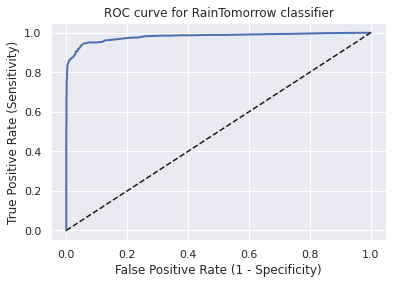

In [705]:
# without cross validation and without Embalaced
Classifcation_Model ("Random forest" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Random forest" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

In [706]:
Data_Result.head(n=20)

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.581056,0.698031,0.634195
0,Cross_Val,NoEmbalaced,Logistic,0.550952,0.701038,0.818255
0,NoCross_Val,NoEmbalaced,SVM,0.000000,0.000000,0.000000
0,Cross_Val,NoEmbalaced,SVM,0.000000,0.000000,0.734627
0,NoCross_Val,NoEmbalaced,KNN,0.313297,0.530864,0.394044
0,Cross_Val,NoEmbalaced,KNN,0.307933,0.559123,0.751101
0,NoCross_Val,NoEmbalaced,XGboost,0.888889,0.943907,0.915572
0,Cross_Val,NoEmbalaced,XGboost,0.894943,0.949193,0.959249
0,NoCross_Val,NoEmbalaced,Naive Bayes,0.846995,0.670996,0.748792
0,Cross_Val,NoEmbalaced,Naive Bayes,0.862865,0.667372,0.849354


# Conclusion : 
- The best result model :    
> - Cross_Val	NoEmbalaced	Random forest	
  - NoCross_Val	NoEmbalaced	Random forest
  - Cross_Val	NoEmbalaced	Decision Tree
  - NoCross_Val	NoEmbalaced	XGboost	
  - Cross_Val	NoEmbalaced	XGboost	

> i select :    
  - Cross_Val	NoEmbalaced	[XGboost]
